In [18]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


In [19]:

# features
X = [[0, 0], [1, 1]]

# target
y = [0, 1]

clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

# decision tree classifier will predict class with lowest index
clf.predict([[2., 2.]])

# probability of each class
clf.predict_proba([[2., 2.]])


array([[0., 1.]])

In [20]:

iris = load_iris()

X, y = iris.data, iris.target

clf = DecisionTreeClassifier()
clf = clf.fit(X, y)


[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

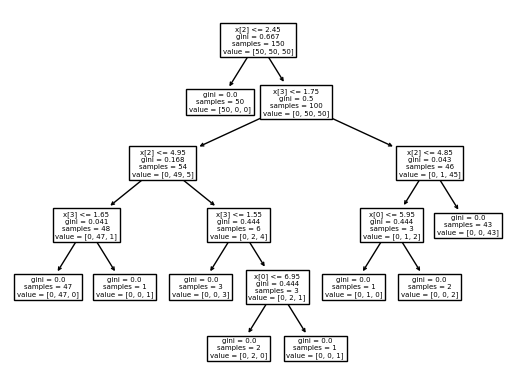

In [21]:

plot_tree(clf)


In [22]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=0)

print()

for max_depth in [1, 2, 3, 4, 5, 6, 7]:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf = clf.fit(X_train, y_train)
    print(' max_depth = ' + str(max_depth) + ': ' + str(clf.score(X_test, y_test)))

print()

for min_split in [2, 3, 5, 10, 15, 20]:
    clf = DecisionTreeClassifier(min_samples_split=min_split)
    clf = clf.fit(X_train, y_train)
    print(' min_split = ' + str(max_depth) + ': ' + str(clf.score(X_test, y_test)))

print()



 max_depth = 1: 0.6223776223776224
 max_depth = 2: 0.8111888111888111
 max_depth = 3: 0.7552447552447552
 max_depth = 4: 0.7972027972027972
 max_depth = 5: 0.7062937062937062
 max_depth = 6: 0.951048951048951
 max_depth = 7: 0.6013986013986014

 min_split = 7: 0.7972027972027972
 min_split = 7: 0.7972027972027972
 min_split = 7: 0.6223776223776224
 min_split = 7: 0.32167832167832167
 min_split = 7: 0.32167832167832167
 min_split = 7: 0.32167832167832167



In [23]:

# use GridSearchCV to find best hyperparameters 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = { 'max_depth': [1, 2, 3, 4, 5, 6, 7], 'min_samples_split': [2, 3, 5, 10, 15, 20]}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_.score(X_test, y_test)

print()
print(' > Best params: ' + str(grid_search.best_params_))
print(' > Best score: ' + str(grid_search.best_score_))
print()



 > Best params: {'max_depth': 6, 'min_samples_split': 2}
 > Best score: 0.95



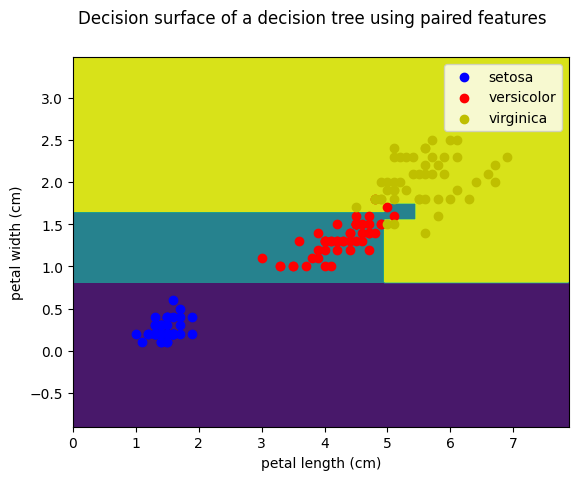

In [26]:

# display surface decision

nb_classes = 3
plot_colors = "bry"
plot_step = 0.02

# petal length && petal witdh
pair = [2, 3]

# keep only 2 attributs
X = iris.data[:, pair]
y = iris.target

# train
clf = DecisionTreeClassifier().fit(X, y)

# display
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cs = plt.contourf(xx, yy, Z)

plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis('Tight')

# display learn points
for i, color in zip(range(nb_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i])
    
plt.axis('Tight')
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()


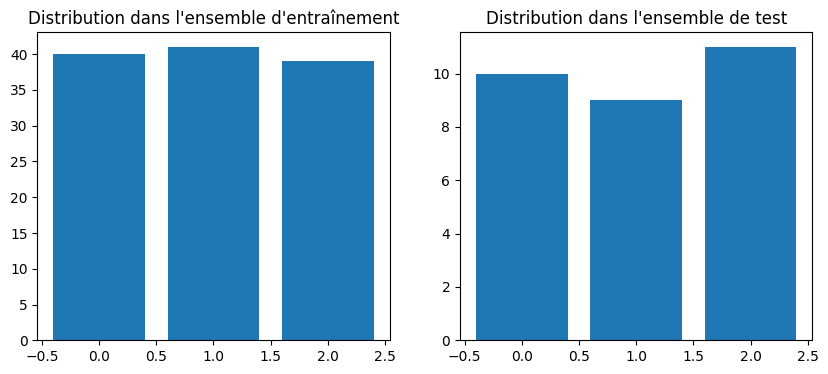

In [27]:

# use only "petal length" && "petal width"

df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target  

X = df_iris[['petal length (cm)', 'petal width (cm)']]
y = df_iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classes_train = y_train.value_counts()
classes_test = y_test.value_counts()

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].bar(classes_train.index, classes_train.values)
axes[0].set_title('Distribution dans l\'ensemble d\'entraînement')

axes[1].bar(classes_test.index, classes_test.values)
axes[1].set_title('Distribution dans l\'ensemble de test')

plt.show()


In [66]:

print()

for x in range(3, 11):
    estimator = DecisionTreeClassifier(max_depth=x, random_state=42)
    estimator = estimator.fit(X_train, y_train)
    print('Score with max_depth = ' + str(x))
    print('    - Train data: ', estimator.score(X_train, y_train))
    print('    - Test data: ', estimator.score(X_test, y_test))
    print()

print()



Score with max_depth = 3
    - Train data:  0.9583333333333334
    - Test data:  1.0

Score with max_depth = 4
    - Train data:  0.975
    - Test data:  1.0

Score with max_depth = 5
    - Train data:  0.9833333333333333
    - Test data:  1.0

Score with max_depth = 6
    - Train data:  0.9916666666666667
    - Test data:  1.0

Score with max_depth = 7
    - Train data:  0.9916666666666667
    - Test data:  1.0

Score with max_depth = 8
    - Train data:  0.9916666666666667
    - Test data:  1.0

Score with max_depth = 9
    - Train data:  0.9916666666666667
    - Test data:  1.0

Score with max_depth = 10
    - Train data:  0.9916666666666667
    - Test data:  1.0


